In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv('GWAR_dataset.csv')

# Define features and target
features = ['Caffeine', 'Carbohydrate', 'FAT', 'Fat, saturated', 'Fiber', 'Iron', 'Lactose', 'Protein', 'Starch', 'TOTAL TRANS FATTY ACID', 'Vitamin A', 'Vitamin B12', 'Vitamin C', 'Vitamin D', 'Vitamin E']
target = 'CALORIES'

# Split into train, validation, and test set (70%, 15%, 15%)
train, temp = train_test_split(df, test_size=0.3, random_state=42)
val, test = train_test_split(temp, test_size=0.5, random_state=42)

# Initialize the model
model = RandomForestRegressor(random_state=42)

# Define the parameter grid to search over
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of trees
    'max_depth': [None, 5, 10],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10]  # Minimum number of samples required to split a node
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(train[features], train[target])

# Get the best model and its hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print("Best Hyperparameters:")
print(best_params)

# Make predictions on the testing set using the best model
test_predictions = best_model.predict(test[features])

# Evaluate the model
mse = mean_squared_error(test[target], test_predictions)
r2 = r2_score(test[target], test_predictions)

print(f'Test MSE: {mse}')
print(f'Test R^2: {r2}')


Best Hyperparameters:
{'max_depth': None, 'min_samples_split': 10, 'n_estimators': 150}
Validation MSE: 4020.495851972773
Validation R^2: 0.8841390036442301


In [8]:
# Calculate the Mean Absolute Error (MAE)
mae = mean_absolute_error(test[target], test_predictions)
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 25.192560705416664


In [16]:
# Create a new DataFrame with the predictions
df_predictions = pd.DataFrame(test_predictions, columns=['predicted_calories'])

# Save the predictions to a new CSV file
df_predictions.to_csv('predictions_hp.csv', index=False)

In [17]:
# Create a new DataFrame with the actual target values and the predictions
df_predictions = pd.DataFrame({
    'actual_calories': test[target],
    'predicted_calories': test_predictions
})

# Save the DataFrame to a new CSV file
df_predictions.to_csv('predictions.csv', index=False)

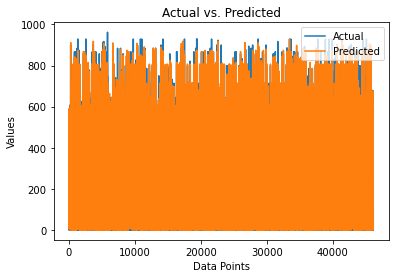

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
data = pd.read_csv('predictions_hp.csv')

# Extract the actual and predicted values
actual_values = data['actual_calories']
predicted_values = data['predicted_calories']

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the actual values
ax.plot(actual_values, label='Actual')

# Plot the predicted values
ax.plot(predicted_values, label='Predicted')

# Set labels and title
ax.set_xlabel('Data Points')
ax.set_ylabel('Values')
ax.set_title('Actual vs. Predicted')

# Display the legend
ax.legend()

# Show the plot
plt.show()
